# Introduction to MODIS Ocean Colour Dataset in DEA

**What does this notebook do?** 
This notebook demonstrates how to import MODIS Ocean Colour data using DEA, plot the data, and generate and plot time-series for a location.

**Requirements** 
You need to run the following commands from the command line prior to launching jupyter notebook from the same terminal so that the required libraries and paths are set.

module use /g/data/v10/public/modules/modulefiles

module load dea

If you find an error or bug in this notebook, please either create an 'Issue' in the Github repository, or fix it yourself and create a 'Pull' request to contribute the updated notebook back into the repository (See the repository README for instructions on creating a Pull request).

**Date:** last updated 16th, Jan, 2019

**Author:** Ayers Damien, Zhi Huang

**Import modules**

In [2]:
from datacube import Datacube
from datacube.storage.masking import mask_invalid_data
%matplotlib inline
import matplotlib.pyplot as plt


**Specify a development database to connect to. It is on a different database server agdcstaging-db.nci.org.au, which means that your ~/.pgpass file will need to specify a password to connect to it as well.**

In [3]:
dc = Datacube(config='/g/data/u46/users/dsg547/modis_oc.conf')

**The only product in this database is the daily ocean colour data between 2002 and 2018.**

In [7]:
dc.list_products()

,name,description,label,platform,instrument,time,lon,creation_time,format,lat,product_type,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
5,modis_oc_1d,MODIS Ocean Cover Daily,None,MODIS,None,None,None,None,None,None,modis_oc_1d,EPSG:4326,"(-0.01, 0.01)",None,"(latitude, longitude)"


**These are the available measurements**

In [8]:
dc.list_measurements()

dtype                 name  nodata  \
product     measurement                                                 
modis_oc_1d K_490                float32                K_490  -999.0   
            chl_gsm              float32              chl_gsm  -999.0   
            chl_oc3              float32              chl_oc3  -999.0   
            dt                   float32                   dt  -999.0   
            ipar                 float32                 ipar  -999.0   
            l2_flags               int32             l2_flags    -1.0   
            nanop_brewin2010at   float32   nanop_brewin2010at  -999.0   
            nanop_brewin2012in   float32   nanop_brewin2012in  -999.0   
            npp_vgpm_eppley_gsm  float32  npp_vgpm_eppley_gsm  -999.0   
            npp_vgpm_eppley_oc3  float32  npp_vgpm_eppley_oc3  -999.0   
            owtd                    int8                 owtd    -1.0   
            par                  float32                  par  -999.0   
            picop_brewin2010at   float32   picop_brewin2010at  -999.0   
            picop_brewin2012in   float32   picop_brewin2012in  -999.0   
            sst                  float32                  sst  -999.0   
            sst_quality            int16          sst_quality    -1.0   

                                                          units  
product     measurement                                          
modis_oc_1d K_490                                          m^-1  
            chl_gsm                                      mg/m^3  
            chl_oc3                                      mg/m^3  
            dt                   days since 2016-01-01 00:00:00  
            ipar                                  Ein m^-2 s^-1  
            l2_flags                                          1  
            nanop_brewin2010at                          percent  
            nanop_brewin2012in                          percent  
            npp_vgpm_eppley_gsm                    mg.m^-3.d^-1  
            npp_vgpm_eppley_oc3                    mg.m^-3.d^-1  
            owtd                                              1  
            par                                 Ein m^-2 day^-1  
            picop_brewin2010at                          percent  
            picop_brewin2012in                          percent  
            sst                                         Celsius  
            sst_quality                                       1

**Load 15 days of SST (Sea Surface Temperature) and CHL_GSM (Chlorophyll _a_) data from the start of 2016. Note that the resolution has been resampled from 0.01 dd to 0.1 dd to save memory usage.**

In [4]:
import time
now = time.time()

data = dc.load(product='modis_oc_1d', lat=(-27,-28), lon=(157,158), measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")


It took 1042.8214292526245 second


In [5]:
import sys
sys.getsizeof(data.sst.data)

236000128

In [6]:
data

<xarray.Dataset>
Dimensions:    (latitude: 100, longitude: 100, time: 5900)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-04T11:59:59.999999 ... 2018-10-12T11:59:59.999999
  * latitude   (latitude) float64 -27.0 -27.02 -27.02 ... -27.97 -27.98 -27.99
  * longitude  (longitude) float64 157.0 157.0 157.0 157.0 ... 158.0 158.0 158.0
Data variables:
    sst        (time, latitude, longitude) float32 -999.0 -999.0 ... -999.0
Attributes:
    crs:      EPSG:4326

In [7]:
import time
now = time.time()

data1 = dc.load(product='modis_oc_1d', lat=(-27,-28), lon=(157,158), time=('2016-01-01', '2017-01-01'),measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")


It took 34.47221279144287 second


In [8]:
import sys
sys.getsizeof(data1.sst.data)

14640128

In [9]:
data1

<xarray.Dataset>
Dimensions:    (latitude: 100, longitude: 100, time: 366)
Coordinates:
  * time       (time) datetime64[ns] 2016-01-01T11:59:59.999999 ... 2017-01-01T11:59:59.999999
  * latitude   (latitude) float64 -27.0 -27.02 -27.02 ... -27.97 -27.98 -27.99
  * longitude  (longitude) float64 157.0 157.0 157.0 157.0 ... 158.0 158.0 158.0
Data variables:
    sst        (time, latitude, longitude) float32 -999.0 -999.0 ... -999.0
Attributes:
    crs:      EPSG:4326

In [10]:
import time
now = time.time()

data2 = dc.load(product='modis_oc_1d', lat=(-27,-28), lon=(157,158), time=('2014-01-01', '2017-01-01'),measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 99.16870832443237 second


In [12]:
import sys
sys.getsizeof(data2.sst.data)

1120544192

In [13]:
data2

<xarray.Dataset>
Dimensions:    (latitude: 7002, longitude: 10002, time: 4)
Coordinates:
  * time       (time) datetime64[ns] 2016-03-17T11:59:59.999999 ... 2016-03-20T11:59:59.999999
  * latitude   (latitude) float64 10.0 9.995 9.985 9.975 ... -59.98 -60.0 -60.01
  * longitude  (longitude) float64 79.99 80.0 80.01 80.02 ... 180.0 180.0 180.0
Data variables:
    sst        (time, latitude, longitude) float32 -999.0 -999.0 ... -999.0
Attributes:
    crs:      EPSG:4326

In [11]:
import time
now = time.time()

data2 = dc.load(product='modis_oc_1d', lat=(-27,-28), lon=(157,158), time=('2010-01-01', '2017-01-01'),measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 245.02673935890198 second


In [12]:
data2

<xarray.Dataset>
Dimensions:    (latitude: 100, longitude: 100, time: 2557)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01T11:59:59.999999 ... 2017-01-01T11:59:59.999999
  * latitude   (latitude) float64 -27.0 -27.02 -27.02 ... -27.97 -27.98 -27.99
  * longitude  (longitude) float64 157.0 157.0 157.0 157.0 ... 158.0 158.0 158.0
Data variables:
    sst        (time, latitude, longitude) float32 -999.0 -999.0 ... -999.0
Attributes:
    crs:      EPSG:4326

In [15]:
import sys
sys.getsizeof(data3.sst.data)

236000128

In [13]:
import time
now = time.time()

data3 = dc.load(product='modis_oc_1d', lat=(-27,-28), lon=(157,158), measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 728.5271275043488 second


In [14]:
data3

<xarray.Dataset>
Dimensions:    (latitude: 100, longitude: 100, time: 5900)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-04T11:59:59.999999 ... 2018-10-12T11:59:59.999999
  * latitude   (latitude) float64 -27.0 -27.02 -27.02 ... -27.97 -27.98 -27.99
  * longitude  (longitude) float64 157.0 157.0 157.0 157.0 ... 158.0 158.0 158.0
Data variables:
    sst        (time, latitude, longitude) float32 -999.0 -999.0 ... -999.0
Attributes:
    crs:      EPSG:4326

In [16]:
import time
now = time.time()

data4 = dc.load(product='modis_oc_1d', lat=-27, lon=157, measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 700.966952085495 second


In [17]:
data4

<xarray.Dataset>
Dimensions:    (latitude: 1, longitude: 1, time: 5900)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-04T11:59:59.999999 ... 2018-10-12T11:59:59.999999
  * latitude   (latitude) float64 -27.0
  * longitude  (longitude) float64 157.0
Data variables:
    sst        (time, latitude, longitude) float32 -999.0 21.48 ... -999.0
Attributes:
    crs:      EPSG:4326

In [18]:
import time
now = time.time()

data5 = dc.load(product='modis_oc_1d', lat=-27, lon=157, time=('2010-01-01', '2017-01-01'),measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 228.1155514717102 second


In [19]:
import time
now = time.time()

data6 = dc.load(product='modis_oc_1d', lat=-27, lon=157, time=('2010-01-01', '2013-01-01'),measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 91.6866672039032 second


In [20]:
import time
now = time.time()

data7 = dc.load(product='modis_oc_1d', lat=-27, lon=157, time=('2010-01-01', '2011-01-01'),measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 31.612260103225708 second


In [21]:
import time
now = time.time()

data8 = dc.load(product='modis_oc_1d', lat=(-27,-35), lon=(157,161), time=('2010-01-01', '2011-01-01'),measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 49.61196231842041 second


In [22]:
data8

<xarray.Dataset>
Dimensions:    (latitude: 800, longitude: 400, time: 366)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01T11:59:59.999999 ... 2011-01-01T11:59:59.999999
  * latitude   (latitude) float64 -27.0 -27.02 -27.02 ... -34.98 -34.98 -34.99
  * longitude  (longitude) float64 157.0 157.0 157.0 157.0 ... 161.0 161.0 161.0
Data variables:
    sst        (time, latitude, longitude) float32 -999.0 -999.0 ... 22.305
Attributes:
    crs:      EPSG:4326

In [23]:
import time
now = time.time()

data9 = dc.load(product='modis_oc_1d', lat=(-27,-35), lon=(157,161), time=('2010-01-01', '2013-01-01'),measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 147.0663070678711 second


In [24]:
import time
now = time.time()

data10 = dc.load(product='modis_oc_1d', lat=(-27,-35), lon=(157,161), time=('2010-01-01', '2017-01-01'),measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 341.4729437828064 second


In [25]:
import time
now = time.time()

data11 = dc.load(product='modis_oc_1d', lat=(-27,-35), lon=(157,161), measurements=(['sst']))
then = time.time()

elapsed = then - now
print("It took", elapsed, "second")

It took 1094.365430355072 second


In [26]:
data11

<xarray.Dataset>
Dimensions:    (latitude: 800, longitude: 400, time: 5900)
Coordinates:
  * time       (time) datetime64[ns] 2002-07-04T11:59:59.999999 ... 2018-10-12T11:59:59.999999
  * latitude   (latitude) float64 -27.0 -27.02 -27.02 ... -34.98 -34.98 -34.99
  * longitude  (longitude) float64 157.0 157.0 157.0 157.0 ... 161.0 161.0 161.0
Data variables:
    sst        (time, latitude, longitude) float32 -999.0 -999.0 ... -999.0
Attributes:
    crs:      EPSG:4326

In [27]:
import sys
sys.getsizeof(data11.sst.data)

7552000128

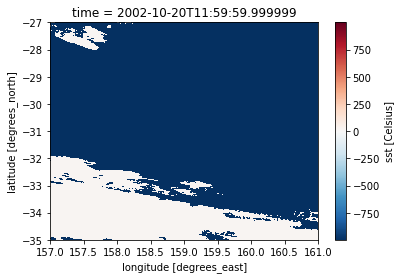

In [29]:
data11.sst[100].plot()

In [ ]:
data11 = mask_invalid_data(data11)